# Objective of the Analysis
* To conclude/predict if a new cancer patients will survive more than 5 years or die within 5 years based on their age at the time of operation(numerical), year of operation(numerical) and number of positive axillary nodes detected(numerical).

# Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
import warnings
warnings.filterwarnings(action="ignore")
sns.set(font_scale = 1.3, palette="hls")

In [2]:
data = pd.read_csv("haberman.csv")
print("Shape: ",data.shape)     #to get an idea about data-points and features
print("Columns: ",data.columns) #to view the column headers in haberman dataset
print("============================================")
print(data.head())             #to get an idea of how the data looks
print("============================================")
print(data["status"].value_counts()) #Output shows that haberman dataset is an imbalanced datasets
print("============================================")
print(data.describe())

Shape:  (306, 4)
Columns:  Index(['age', 'year', 'nodes', 'status'], dtype='object')
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
1    225
2     81
Name: status, dtype: int64
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


<b>Observations:</b>
* Number of points = 306
* Numer of features = 3 (age,year,nodes)
* Number of classes attribute= 1 (status= 1 -> patient survived 5 years or longer and status= 2 -> patient died within 5 year)
* Data-points per class = 225 people have status =1 and 81 have status=2. Ratio of status 1:status 2= 3(approx). Hence the dataset is slightly imbalanced.
* 25% of people have no nodes
* Mean age = 52 (approx) and 75% of the people are below 60 years of age (approx.)
* Missing Attribute Values: None

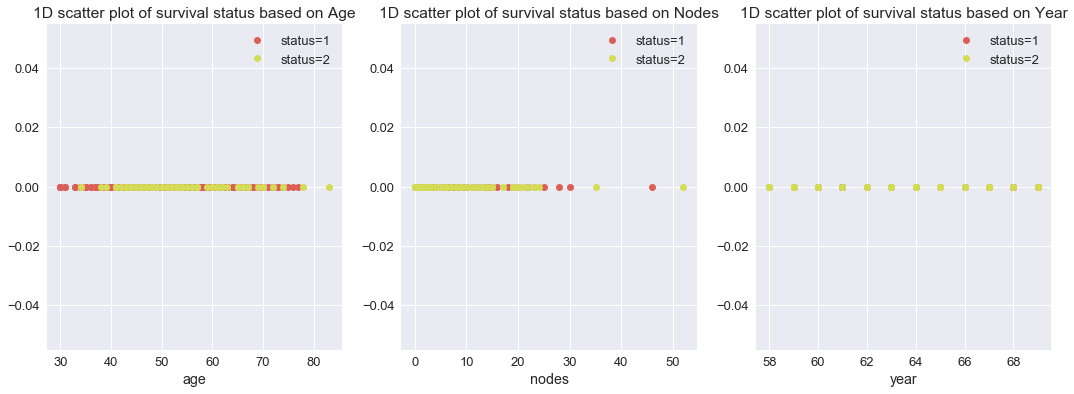

In [3]:
#1D Scatter plot of Survival Status using age
data_status_1 = data.loc[data["status"] == 1];
data_status_2 = data.loc[data["status"] == 2];
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(data_status_1["age"], np.zeros_like(data_status_1['age']), 'o', label='status=1')
plt.plot(data_status_2["age"], np.zeros_like(data_status_2['age']), 'o', label='status=2')
plt.legend()
plt.xlabel("age")
plt.title('1D scatter plot of survival status based on Age')
plt.subplot(132)
plt.plot(data_status_1["nodes"], np.zeros_like(data_status_1['nodes']), 'o', label='status=1')
plt.plot(data_status_2["nodes"], np.zeros_like(data_status_2['nodes']), 'o', label='status=2')
plt.legend()
plt.xlabel("nodes")
plt.title('1D scatter plot of survival status based on Nodes')
plt.subplot(133)
plt.plot(data_status_1["year"], np.zeros_like(data_status_1['year']), 'o', label='status=1')
plt.plot(data_status_2["year"], np.zeros_like(data_status_2['year']), 'o', label='status=2')
plt.legend()
plt.xlabel("year")
plt.title('1D scatter plot of survival status based on Year')
plt.show()

<b>Observations:</b>
* Outliers found when age>80 and nodes>28
* Very hard to make sense as points are overlapping a lot.

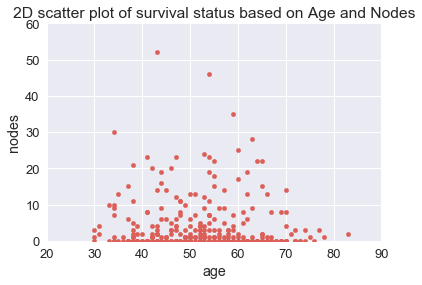

In [4]:
#2D scatter plot of Survival Status using age and nodes
data.plot(kind='scatter', x='age', y='nodes', title='2D scatter plot of survival status based on Age and Nodes')
plt.axis([20, 90, 0, 60])
plt.show()

<b>Observations:</b>
* Not being able to distinguish between data points w.r.t status as all of them are of same color

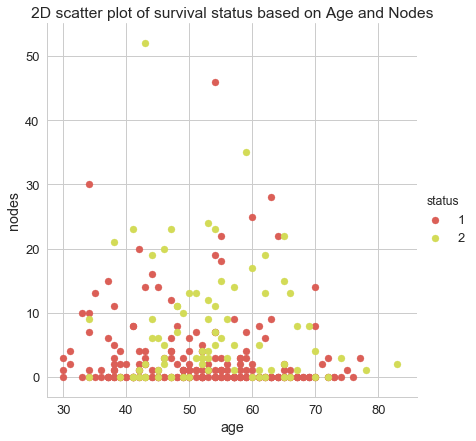

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size=6).map(plt.scatter, "age", "nodes").add_legend()
plt.title('2D scatter plot of survival status based on Age and Nodes')
plt.show()

<b>Observations:</b>
* Since different status color is present data-points are distinguishable but not seperable from above graph.

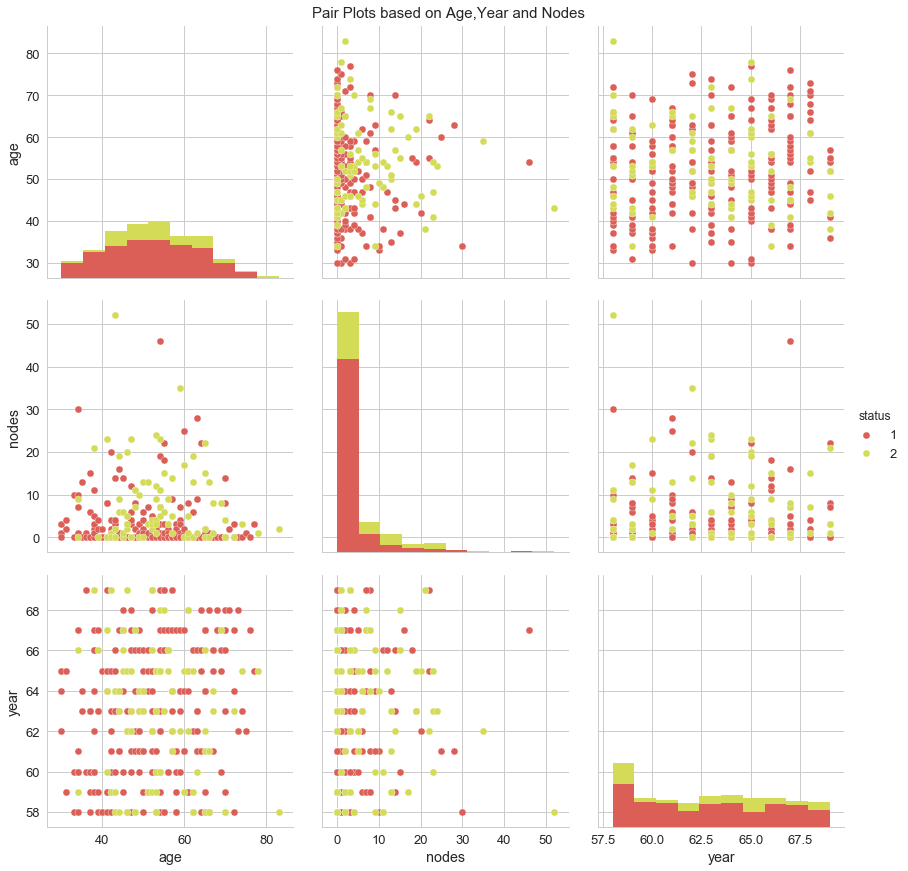

In [6]:
#Pairplots of age,year and nodes
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", vars=["age","nodes","year"] , size=4).fig.suptitle("Pair Plots based on Age,Year and Nodes",
                                                                                    y=1.005, fontsize=15)
plt.show()

<b>Observations:</b>
* Diagnol plots(plot- 1,5,9) are histograms for each feature(age,year,nodes).Plots above diagonal are mirror images(rotated 90 deg) of below diagonal plots. So we are gonna consider above diagonal plots only.
* Plot 2 between age(y-axis) and nodes(x-axis) - data points overlapped.
* Plot 3 between age(y-axis) and year(x-axis) - max of data is overlapped data.
* Plot 6 between nodes(y-axis) and year(x-axis) - max data is overlapped.
* The plot between year and nodes is comparatively better than the other two.

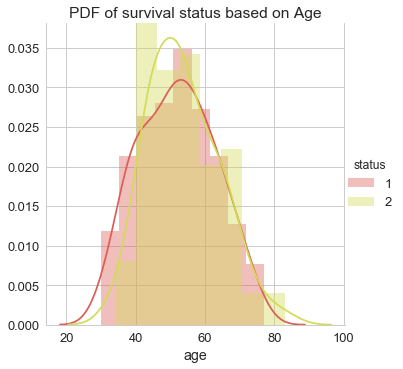

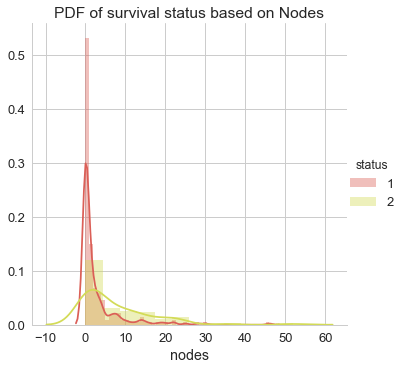

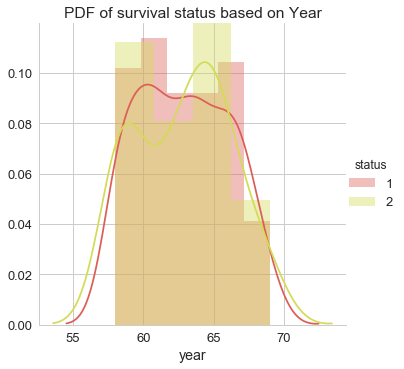

In [7]:
#Univaraite analysis(PDF) of age, nodes and year
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "age").add_legend()
plt.title('PDF of survival status based on Age')
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.title('PDF of survival status based on Nodes')
sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.title('PDF of survival status based on Year')
plt.show()

<b>Observations:</b>
* In plot for nodes, we notice that red curve peaks most from 0-5 approx. suggesting we have more data points, depicting that people have more chance of survival and above 5, that chance of survival generally degrades as pdf curve comes down gradually.
* Plots for age and year are literally overlapping and we cannot obtain any clear conclusion from them.

Based on Age

--------------

All people who survived 5 years or longer:

Bin Edges:  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
Pdf:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

All people who died within 5 years:

Bin Edges:  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
Pdf:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



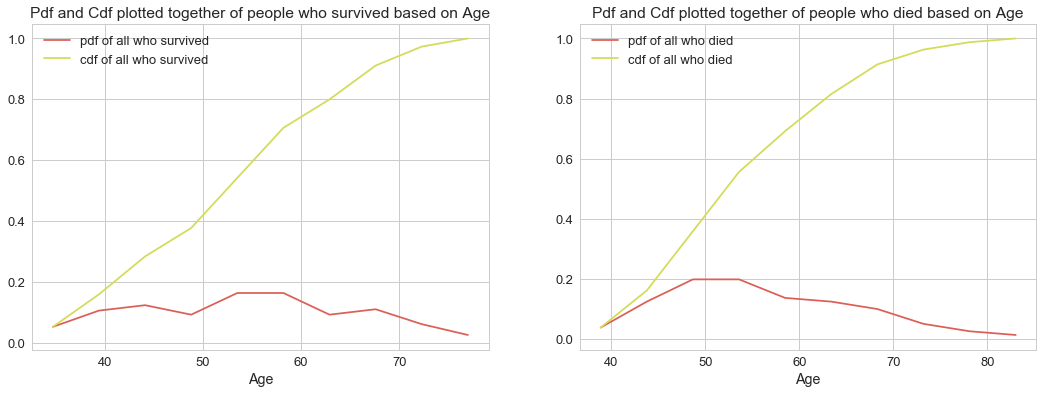

In [8]:
#Univaraite analysis(CDF) based on age
survive_T = data[data['status'] == 1]        #survive_T = all people who survived 5 years or longer
survive_F = data[data['status'] == 2]        #survive_F = all people who died within 5 years
print("Based on Age\n")
print("--------------\n")
count,edges = np.histogram(survive_T['age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who survived','cdf of all who survived'])
plt.title('Pdf and Cdf plotted together of people who survived based on Age')
plt.xlabel("Age")
print('All people who survived 5 years or longer:\n')
#print("Count: ",count)
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
count,edges = np.histogram(survive_F['age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
print('All people who died within 5 years:\n')
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
plt.subplot(122)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who died','cdf of all who died'])
plt.title('Pdf and Cdf plotted together of people who died based on Age')
plt.xlabel("Age")
plt.show()

<b>Observations:</b>
* People below the age of 38 will definitely survive as seen from the right graph.
* Most people who died were between 45 and 58 years of age(from right side pdf).

Based on Year

--------------

All people who survived 5 years or longer:

Bin Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
Pdf:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

All people who died within 5 years:

Bin Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
Pdf:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



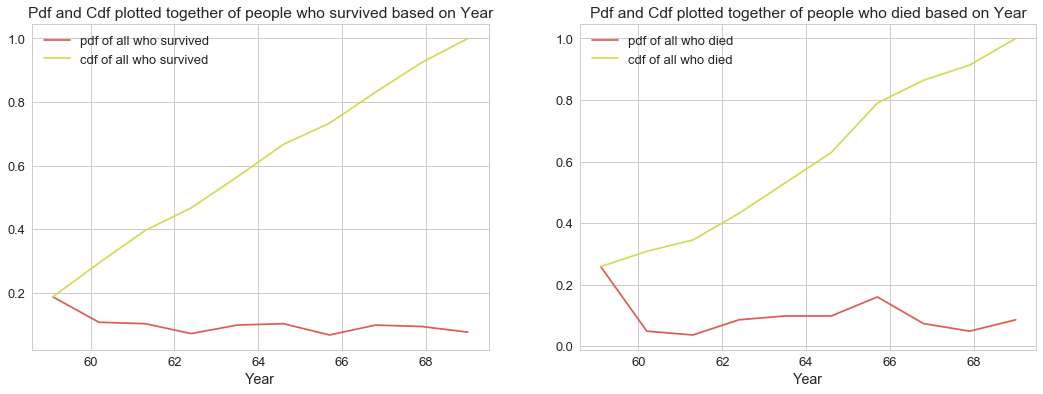

In [9]:
#Univaraite analysis(CDF) based on year
print("Based on Year\n")
print("--------------\n")
count,edges = np.histogram(survive_T['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who survived','cdf of all who survived'])
plt.title('Pdf and Cdf plotted together of people who survived based on Year')
print('All people who survived 5 years or longer:\n')
plt.xlabel("Year")
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
count,edges = np.histogram(survive_F['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
print('All people who died within 5 years:\n')
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
plt.subplot(122)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who died','cdf of all who died'])
plt.title('Pdf and Cdf plotted together of people who died based on Year')
plt.xlabel("Year")
plt.show()

<b>Observations:</b>
* Most successful operations were performed in the year 1961 and most unsuccessful ones were performed in the year 1965.(from right pdf curve)
* CDF denoting survival rate is a straight line indicating that down the years, people survived on an equal rate.
* From the right graph, we see person who was operated between 60 and 65 had less probability of death(small ridge in CDF) and people operated between 1965 and 1967 had more probability of death(small crest in CDF).

Based on Nodes

--------------

All people who survived 5 years or longer:

Bin Edges:  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
Pdf:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

All people who died within 5 years:

Bin Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
Pdf:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



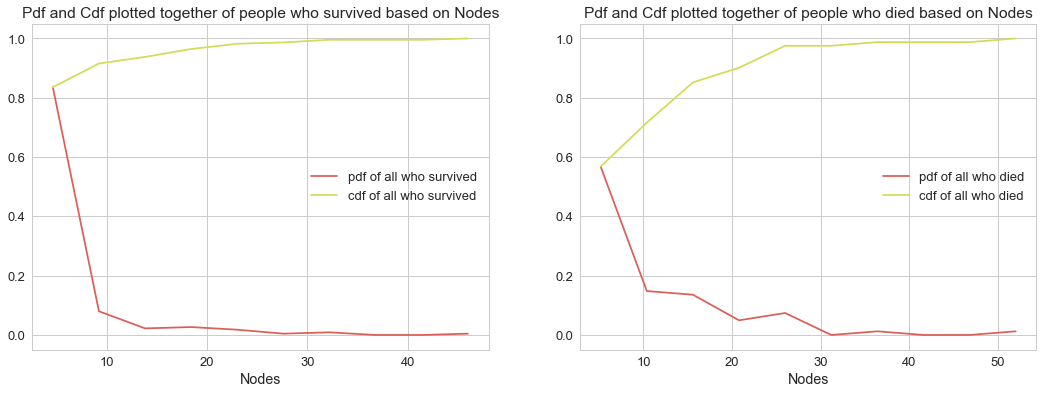

In [10]:
#Univaraite analysis(CDF) based on nodes
print("Based on Nodes\n")
print("--------------\n")
count,edges = np.histogram(survive_T['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who survived','cdf of all who survived'])
plt.title('Pdf and Cdf plotted together of people who survived based on Nodes')
print('All people who survived 5 years or longer:\n')
plt.xlabel("Nodes")
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
count,edges = np.histogram(survive_F['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
print('All people who died within 5 years:\n')
print('Bin Edges: ',edges)
print('Pdf: ',pdf)
print('================================================================================\n')
plt.subplot(122)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)
plt.legend(['pdf of all who died','cdf of all who died'])
plt.title('Pdf and Cdf plotted together of people who died based on Nodes')
plt.xlabel("Nodes")
plt.show()

<b>Observations:</b>
* 83%(approx) of people who survived have number of axillary nodes< 5(approx).
* 58%(approx) of people who died have number of axillary nodes< 5(approx).
* Patients with less than 2 nodes are more likely to survive.
* 100%(approx) of people have higher chances of dying who have axillary nodes> 35(approx).

In [11]:
print("Means:")
print("Survive:",np.mean(survive_T["nodes"]))
print("Dead:",np.mean(survive_F["nodes"]))

#The standard deviation are also measures of spread, but they are more affected by 
#extremely high or extremely low values and non normality.
print("\nStd-dev:")
print("Survive:",np.std(survive_T["nodes"]))
print("Dead:",np.std(survive_F["nodes"]))

#MAD is a robust measure of how spread out a set of data is. Mean gets corrupted if one
#outlier is present, but median remains more or less unaffected.
print("\nMedians:")
print("Survive:",np.median(survive_T["nodes"]))
print("Dead:",np.median(survive_F["nodes"]))

print("\nQuantiles:")
print("Survive:",np.percentile(survive_T["nodes"],[25,50,75]))
print("Dead:",np.percentile(survive_F["nodes"],[25,50,75]))

print("\n90th Percentiles:")
print("Survive:",np.percentile(survive_T["nodes"],90))
print("Death:",np.percentile(survive_F["nodes"],90))

#MAD is less affected by outliers because outliers have a smaller effect on the median than they do on the mean.
print ("\nMedian Absolute Deviation:")
print("Survive:",robust.mad(survive_T["nodes"]))
print("Dead:",robust.mad(survive_F["nodes"]))

Means:
Survive: 2.7911111111111113
Dead: 7.45679012345679

Std-dev:
Survive: 5.857258449412131
Dead: 9.128776076761632

Medians:
Survive: 0.0
Dead: 4.0

Quantiles:
Survive: [0. 0. 3.]
Dead: [ 1.  4. 11.]

90th Percentiles:
Survive: 8.0
Death: 20.0

Median Absolute Deviation:
Survive: 0.0
Dead: 5.930408874022408


<b>Observations:</b>
* Mean of the nodes for both the classes differs by 5 units approximately.
* Mean and MAD change drastically showcasing that dataset contains outliers. Presence of outliers was shown in 1D scatter plot above.
* We notice that mean for survival < mean for deaths. So the probability for dying due to cancer is more in data set.
* We notice that median for death = 4 which suggests that patients having an average of 4 nodes have higher chances of deaths.
* We note that 75 percentile of deaths are having minimum of 11 nodes whereas 75 percentile of survivals have minimum of 3 nodes.

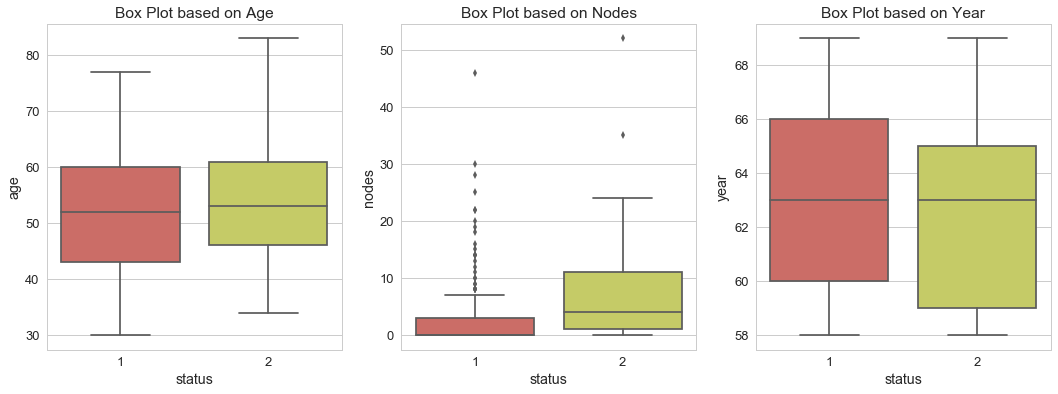

In [12]:
#Box-plots
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.boxplot(x="status",y="age", data=data)
plt.title('Box Plot based on Age')
plt.subplot(132)
sns.boxplot(x="status",y="nodes", data=data)
plt.title('Box Plot based on Nodes')
plt.subplot(133)
sns.boxplot(x="status",y="year", data=data)
plt.title('Box Plot based on Year')
plt.show()

<b>Observations:</b>
* Nodes plot has outliers above 7 for status = 1 (for people who survived after 5 years) and above 12 for status = 2 (for people who died within 5 years)
* The box plots of age and year features give similar results with a substantial overlap of data points. The overlap in the box plot of nodes is less compared to other two features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

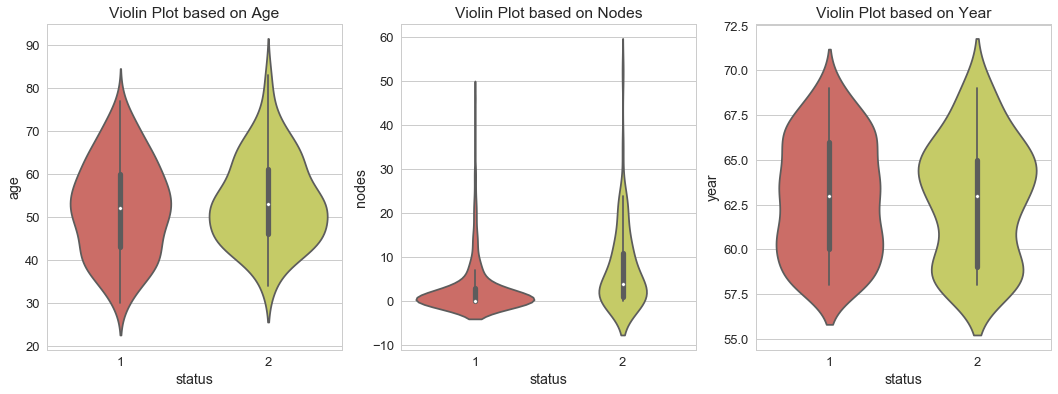

In [13]:
#Violin plots and contour plots
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.violinplot(x="status",y="age", data=data)
plt.title('Violin Plot based on Age')
plt.subplot(132)
sns.violinplot(x="status",y="nodes", data=data)
plt.title('Violin Plot based on Nodes')
plt.subplot(133)
sns.violinplot(x="status",y="year", data=data)
plt.title('Violin Plot based on Year')
plt.show()

<b>Observations:</b>
* More people in age range 45 to 60 who didnot survive.
* Patients having age less than 35 has higher chances of survival and patients with age greater than 75 has lower chances of survival.
* The plots for age and year parameters overlap. The overlap in the plot of nodes is less compared to other features but it still exists and thus it is difficult to consider both classes of patients.
* More people had their operations between 1962 and 1965, but didnot survive more than 5 years.

For all the people who survived, plotting for all the curves(above the diagonal) obtained in Pair Plots(plotted above):


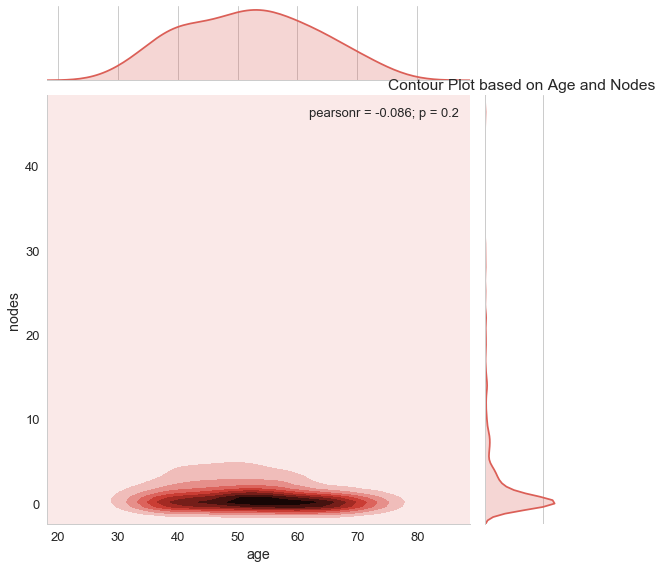

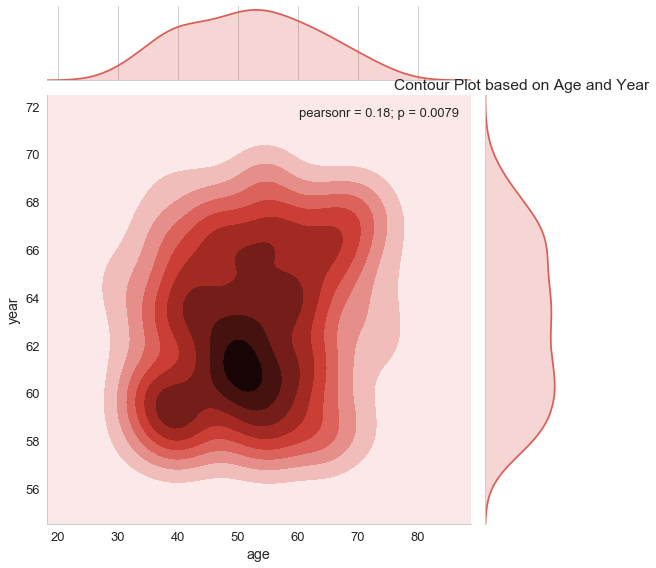

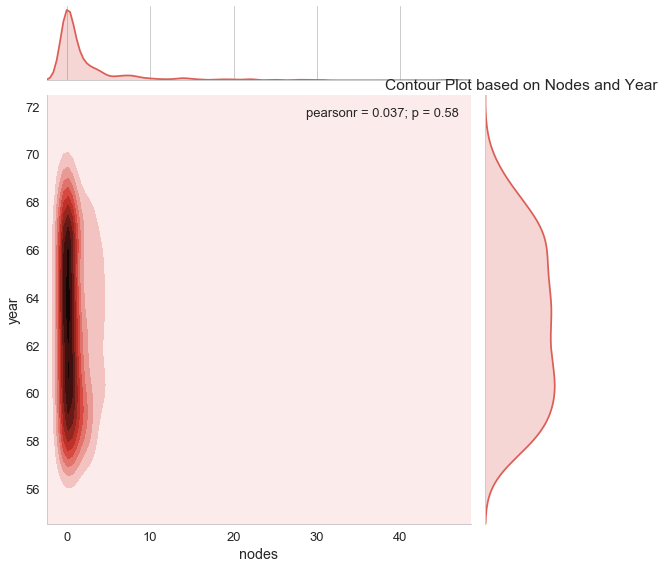

In [14]:
#Contour plots
print("For all the people who survived, plotting for all the curves(above the diagonal) obtained in Pair Plots(plotted above):")
sns.jointplot(x="age",y="nodes",data=survive_T,kind="kde",size= 8)
plt.title('Contour Plot based on Age and Nodes')
plt.grid()
sns.jointplot(x="age",y="year",data=survive_T,kind="kde",size= 8)
plt.title('Contour Plot based on Age and Year')
plt.grid()
sns.jointplot(x="nodes",y="year",data=survive_T,kind="kde",size= 8)
plt.title('Contour Plot based on Nodes and Year')
plt.grid()

<b>Observations:</b>
* People survived more when they are in age range 47–60 and axillary nodes from 0–3
* From 1960 to 1964, more operations were done on patients in the age range 48 to 58

# Final Observations of the Analysis:

* Patients with age less than 35 has higher chances of surviving 5 years or longer and patients with age greater than 75 has lower chances of surviving 5 years or longer. Still age and year of operation can not be called out as a deciding factor to draw a conclusion.
* 83%(approx) of people with number of axillary nodes < 5 have higher chances of survival.
* No perfect relation can be drawn as the dataset is imbalanced. No simple combinations of features are useful in classfication. Hence the objective of classifying the survival status of a new cancer patient based on the given features is very difficult.